<a href="https://colab.research.google.com/github/Ayushman0Singh/BookRecommendationSystem/blob/main/BookRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BOOK RECOMMENDATION**

# Business Problem

Online book reading and selling websites like Kindle and Goodreads compete against each other on many factors. One of those important factors is their book recommendation system. A book recommendation system is designed to recommend books of interest to the buyer.


The purpose of a book recommendation system is to predict buyer’s interest and recommend books to them accordingly. A book recommendation system can take into account many parameters like book content and book quality by filtering user reviews.I will try to make a recommendation system for our given data set.

In [1]:
#importing necessary libraries 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
# we will import libraries further as per need

In [2]:
from google.colab import drive # mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


We have been given 3 data sets, Lets have a look at all the data provided to us and its properties

In [3]:
books = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone Projects/Unsupervised ML/Copy of Books.csv")
users = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone Projects/Unsupervised ML/Copy of Users.csv")
ratings = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone Projects/Unsupervised ML/Copy of Ratings.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
books.head(4) # checking the head and columns 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...


In [ ]:
users.head(5) #first look at the given data

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
ratings.head(5) # chcking the given data-sets

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
#dimensions of book dataframe
books.shape

(271360, 8)

In [ ]:
#checking shape
users.shape

(278858, 3)

In [5]:
ratings.shape

(1149780, 3)

In [ ]:
# dimensions of the 3rd data set
ratings['Book-Rating'].value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

Many users have rated books 0

# Data Cleaning

Before moving onto the data visualisation and EDA. First, lets make sure our data is ready to use.


**Checking for null values data**

In [ ]:
# Books data-frame null values
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [ ]:
# Users data-frame null values
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [ ]:
#checking the ratings df for null values
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Whatever null values we have will be dealt with when do feature engineering and apply constraints. 

# Exploratory Data Analysis

**Rating Distribution**

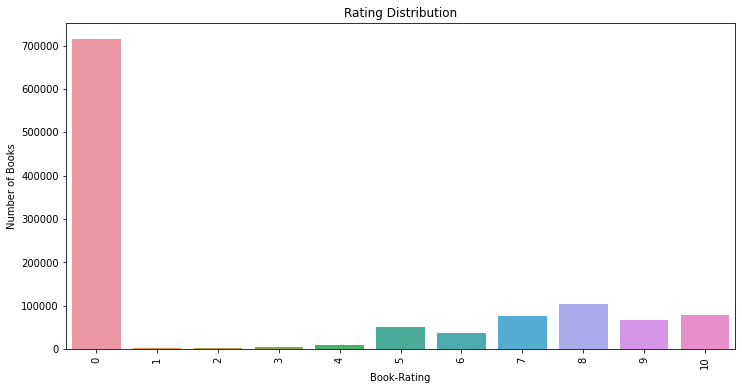

Average rating recieved by all the apps is 2.8669501991685364.


In [ ]:
# show the distribution of rating
plt.figure(figsize=(12, 6))
sns.countplot(x='Book-Rating', data=ratings)
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Books')
plt.show()
print('Average rating recieved by all the apps is {}.'.format(ratings['Book-Rating'].mean()))

Most of the ratings are zero



**HYPOTHESIS**: Most of the users are between the age of 20 to 30 

Text(0, 0.5, 'Count')

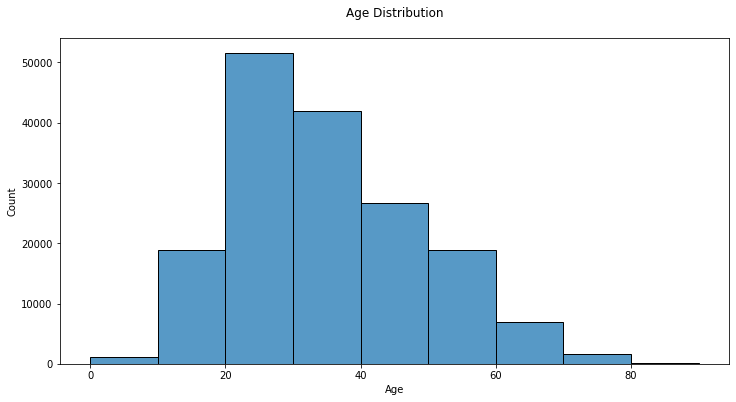

In [ ]:
# plotting the age of thee users 
plt.figure(figsize=(12, 6))
sns.histplot(data=users['Age'], bins=np.arange(0,100,10))
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')

This verifies our hypothesis most of the users are in the age group of 20-30, followed by 30-40.

# Data cleaning and feature Engineering

We will be using Two methods for our Books recommendation system, first we will use a memory Based colaborative model. Then we will also make a model based Colaboraative recomendation system. We will not be using content based algorithms for recommendation since we do not have enough indivisual features for users and the books. Users only has one extra feature. Moreover we might run into the cold-start problem. 

For this exercise we will be using two models:

**1) Memory based Collaborative filtering (using KNN)**

**2) Model based Collaborative filtering (using SVD)**


I tried to apply the above mentioned models to the full data set but I ran into memory problems. To solve these issues I applied a general threshold for our models. This also takes care of the cold start problem.

To reduce the data size we will try to apply certain constraints on the data frame. We can apply many different types of constraints to the dataset. These constraints include:

1. **Popularity Threshold**: Minimum number of user-ratings for a book.
2. **Active user Threshold**: Minimum number of books read for a unique user to be included in the recommendation system. 
3. **Regional Recommendation**: We will also recommend stuff regionally. The user will get recommendations from the users of the same location. We will do it for 1 region to not run into memory problems 

**Active User Threshold**


Remove users with less than 50 ratings(**inactive users**).

To to that, we will apply value_counts on user-id, each repetation of user means a new rating for a book by the same user. Then we will pick up users with atleast 50 repetions/ratings and filter them in our ratings data frame.
This also makes sure that all our users are consistent readers. 

In [6]:
# checking the number of users and thier number ratings
counts1 = ratings['User-ID'].value_counts()
print(counts1)

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: User-ID, Length: 105283, dtype: int64


In [7]:
#keeping users with more than 50 ratings 
counts1_50 = counts1[counts1 >= 50].index # list of user-ids with more than 200 ratings
ratings = ratings[ratings['User-ID'].isin(counts1_50)]  # updating the whole data frame with only users with high ratings

In [8]:
ratings

,User-ID,ISBN,Book-Rating
173,276847,0446364193,0
174,276847,3257200552,5
175,276847,3379015180,0
176,276847,3404145909,8
177,276847,3404148576,8
...,...,...,...
1149744,276688,0836236688,10
1149745,276688,0892966548,10
1149746,276688,1551669315,6
1149747,276688,1575660792,7


In [9]:
ratings['User-ID'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
112240       50
206438       50
270801       50
101620       50
265784       50
Name: User-ID, Length: 3427, dtype: int64


Starting from the original data set, we will be only looking at the popular books. In order to find out which books are popular, we combine books data with ratings data.

In [10]:
# merging rating with users
combine_book_rating = pd.merge(ratings, books,how = 'inner', on='ISBN') #merging two dataframes (inner join since we only want ifo of users with high rating)
columns =['Book-Author',	'Year-Of-Publication',	'Publisher',	'Image-URL-S',	'Image-URL-M',	'Image-URL-L'] #list of unnecessary columns
combine_book_rating = combine_book_rating.drop(columns, axis=1) #droping those columns
combine_book_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels)
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels)
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels)
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels)
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels)


**Book Populatity Threshold**

Next we will apply the constraint where we have a minimum number of ratings for a book to be considered in our recomendation system. 

In [11]:
#collecting total rating counts
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['Book-Title']) # clearing null/nan values from Book-Title
#counting number of ratings for a book and renaming the columns appropiately
book_rating_Count = combine_book_rating.groupby(by = ['Book-Title'])['Book-Rating'].count().reset_index().rename(columns = {'Book-Rating': 'totalRatingCount'})
book_rating_Count.head()

,Book-Title,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [12]:
#combine with main data frame
#use left join since we want rating count for all the books in combined_book_rating column
rating_with_totalRatingCount = combine_book_rating.merge(book_rating_Count, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
rating_with_totalRatingCount.head()

,User-ID,ISBN,Book-Rating,Book-Title,totalRatingCount
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),198
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),198
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels),198
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),198
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),198


In [13]:
# looking at distribution of totalratingsCount
rating_with_totalRatingCount.describe()

,User-ID,Book-Rating,totalRatingCount
count,703434.000000,703434.000000,703434.000000
mean,140983.957487,2.288061,35.008956
std,80538.878058,3.677189,68.959965
min,183.000000,0.000000,1.000000
25%,71207.000000,0.000000,2.000000
50%,142479.000000,0.000000,8.000000
75%,212645.000000,6.000000,34.000000
max,278843.000000,10.000000,852.000000


In [ ]:
#checking each quantiles of total ratings count closely to decide threshold
print(rating_with_totalRatingCount['totalRatingCount'].quantile(np.arange(0.1, 1, .05)))

0.10      1.0
0.15      1.0
0.20      2.0
0.25      2.0
0.30      3.0
0.35      4.0
0.40      5.0
0.45      6.0
0.50      8.0
0.55     11.0
0.60     14.0
0.65     19.0
0.70     25.0
0.75     34.0
0.80     47.0
0.85     67.0
0.90    101.0
0.95    164.0
Name: totalRatingCount, dtype: float64


We can see that there are many books with rating count more than ~30 this is just the distribution of total rating count. Lets, consider a threshold required count to be around 50. This will include many popular books which have been read by atleast 50 users. This will also make the opinion of users for a book more concrete, since there will be atleast 50 bad or good ratings for each of the books included.

In [14]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount[rating_with_totalRatingCount['totalRatingCount'] >= 50]
rating_popular_book

,User-ID,ISBN,Book-Rating,Book-Title,totalRatingCount
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),198
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),198
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels),198
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),198
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),198
...,...,...,...,...,...
702519,274061,1551663147,10,Fever,58
702928,274808,0449701913,0,Homecoming,82
703220,275970,0865714215,0,Stormy Weather,59
703272,275970,1586210661,9,Me Talk Pretty One Day,257


# Collaborative Filtering Using k-Nearest Neighbors (kNN) / Memory based Model

**Applying a Country/regional Threshold**


In order to improve computing speed, and not run into the “MemoryError” issue, I will limit our user data to those in the India and US. And then combine user data with the rating data and total rating count data.

Lets have a look at number of users from each of these countries.

In [15]:
#mergeing the books+ratings data frame with the user info data frame
combined = rating_popular_book.merge(users, left_on = 'User-ID', right_on = 'User-ID', how = 'left')
# users with location as Undia or US 
india_us_user_rating = combined[combined['Location'].str.contains("india|usa")]
india_us_user_rating= india_us_user_rating.drop('Age', axis=1)
india_us_user_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,totalRatingCount,Location
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),198,"omaha, nebraska, usa"
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),198,"sunnyvale, california, usa"
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),198,"los angeles, california, usa"
8,14521,0446364193,0,Along Came a Spider (Alex Cross Novels),198,"providence, rhode island, usa"
10,16795,0446364193,8,Along Came a Spider (Alex Cross Novels),198,"mechanicsville, maryland, usa"


**Implementing KNN**

We use unsupervised algorithms with sklearn.neighbors. The algorithm we use to compute the nearest neighbors is “brute”, and we specify “metric=cosine” so that the algorithm will calculate the cosine similarity between rating vectors. Finally, we fit the model.

NearestNeighbors(algorithm='brute', metric='cosine')

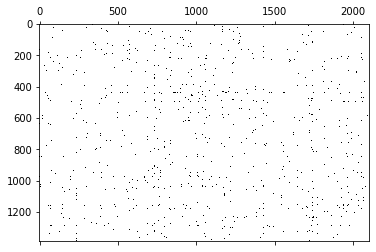

In [16]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

india_us_user_rating = india_us_user_rating.drop_duplicates(['User-ID', 'Book-Title'])  #dropping duplicates since we dont need it in the pivot matrix
india_us_user_rating_pivot = india_us_user_rating.pivot(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating').fillna(0) #filling nan values with zeroes
plt.spy(india_us_user_rating_pivot) #checking the non-zero values in the matrix
india_us_user_rating_matrix = csr_matrix(india_us_user_rating_pivot.values)
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(india_us_user_rating_matrix)

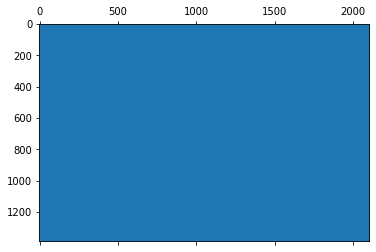

In [17]:
plt.spy(india_us_user_rating_matrix)

In [18]:
india_us_user_rating_pivot.shape[1]

2105

In [19]:
#generating recommendations
random_userbook_rating_index = np.random.choice(india_us_user_rating_pivot.shape[0]) #pick a random row from the pivot table
distances, indices = model_knn.kneighbors(india_us_user_rating_pivot.iloc[random_userbook_rating_index,].values.reshape(1, -1), n_neighbors = 6) # provide the row as features to the kNN
for i in range(0, len(distances.flatten())):   #loop through all the recomendations
    if i == 0:  #selected book 
        print('Recommendations for {0}:\n'.format(india_us_user_rating_pivot.index[random_userbook_rating_index])) 
    else:  
        #recomendations based on cosine distance of the books from selected book
        print('{0}: {1}, with distance of {2}:'.format(i,india_us_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))
        

Recommendations for The Witness:

1: Remembrance, with distance of 0.7365797401021335:
2: Palomino, with distance of 0.7483094136209615:
3: The Other Daughter, with distance of 0.7702795923929324:
4: The House on Hope Street, with distance of 0.7783463022876238:
5: Mixed Blessings, with distance of 0.7858904320494958:


In [20]:
random_userbook_rating_index = np.random.choice(india_us_user_rating_pivot.shape[0]) #pick a random row from the pivot table
distances, indices = model_knn.kneighbors(india_us_user_rating_pivot.iloc[random_userbook_rating_index,].values.reshape(1, -1), n_neighbors = 6) # provide the row as features to the kNN
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(india_us_user_rating_pivot.index[random_userbook_rating_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i,india_us_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for The Tale of the Body Thief (Vampire Chronicles (Paperback)):

1: The Queen of the Damned (Vampire Chronicles (Paperback)), with distance of 0.4404717219029749:
2: The Vampire Lestat (Vampire Chronicles, Book II), with distance of 0.5266563409730081:
3: Interview with the Vampire, with distance of 0.6021358732868319:
4: Lasher: Lives of the Mayfair Witches (Lives of the Mayfair Witches), with distance of 0.6807281272817947:
5: Vittorio the Vampire: New Tales of the Vampires, with distance of 0.7021215149592276:


We have sucessfully impleted collaborative filering using KNN. The user-interacction matrix that we ended up with was quite small after all the constraints. Lets try to implement matrix factorisation **without any regional constraints**. 

This time we will apply the **matrix-factorisation method/SVD** method for recommendations. We will assume some latent interactions between the users and items. Then we will try to come up with the user item interaction matrix by ourselves using SVD, in the process we would be filling the non-interacted items with a rating. We can rank these up for the best recommendations. 

# **Matrix Factorisation** / Model based approach

In [ ]:
#we will be using this matrix for the matrix factorisation method. 
rating_popular_book.drop(columns=['ISBN','totalRatingCount'], inplace = True) #removing useless columns

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
rating_popular_book['User-ID'].value_counts() #checking user-id counts
#since we are going to stratify 'User-ID' for our test train split, lets make sure all the user-ids have multiple instances

11676     1546
35859      704
76352      625
16795      580
153662     573
          ... 
21155        1
32110        1
77039        1
643          1
257198       1
Name: User-ID, Length: 3274, dtype: int64

In [ ]:
#counting # of user-ids with 1 rating
k = rating_popular_book['User-ID'].value_counts().reset_index() #creating a matrix with user-id counts
k[k['User-ID'] == 1].shape[0]   #checking the number of User_ids which have only been repeated once

114

In [ ]:
#removing the rows with unique user_ID, since we need more than 1 to straify.
rating_popular_book = rating_popular_book[rating_popular_book.duplicated(subset=["User-ID"], keep=False)] 

In [ ]:
rating_popular_book.drop_duplicates(inplace = True)
rating_popular_book.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,User-ID,Book-Rating,Book-Title
1,278418,0,Along Came a Spider (Alex Cross Novels)
2,5483,0,Along Came a Spider (Alex Cross Novels)
3,7346,0,Along Came a Spider (Alex Cross Novels)
4,8362,0,Along Came a Spider (Alex Cross Novels)
5,9177,7,Along Came a Spider (Alex Cross Novels)
6,11400,0,Along Came a Spider (Alex Cross Novels)
7,11676,8,Along Came a Spider (Alex Cross Novels)
8,14521,0,Along Came a Spider (Alex Cross Novels)
9,15418,0,Along Came a Spider (Alex Cross Novels)
10,16795,8,Along Came a Spider (Alex Cross Novels)


Since we will be developing an evaluation system for the recommendation system, We need to do a test train split. 

In [ ]:
interactions_train_df, interactions_test_df = train_test_split(rating_popular_book, #spliting the user-item rating dataframe                                        
                                   stratify=rating_popular_book.loc[:,'User-ID'],          #stratify using user-id column
                                   test_size=0.20,                                   #using 20 percent data as test set
                                   random_state=42)

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 107327
# interactions on Test set: 26832


Book-Title,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,...,Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Writ of Execution,Wuthering Heights,Wuthering Heights (Penguin Classics),Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


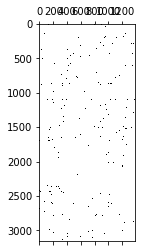

In [ ]:
#Creating a sparse pivot table with users in rows and items in columns
pivot_matrix = interactions_train_df.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating', aggfunc='sum').fillna(0) #agreegating any duplicate entries #filling nan values with 0
plt.spy(pivot_matrix)  # visualising the sparse matrix
pivot_matrix

In [ ]:
from scipy.sparse.linalg import svds
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [ ]:
#checking shapes
print(U.shape)
print(sigma.shape)
print(Vt.shape)

(3160, 15)
(15,)
(15, 1388)


In [ ]:
sigma

array([102.64282866, 104.14509991, 105.63581134, 107.40139552,
       108.21391414, 112.58900599, 116.39487734, 119.00598201,
       121.35875999, 129.66673451, 143.77277009, 154.29425051,
       157.37440403, 168.98612117, 315.80167559])

Sigma here is an 1-d array with 15 elements we need to convert it to a diagonal matrix so that the matrix multiplication goes smoothly and the dimensions are correct.

In [ ]:
#making sigma a diagonal matrix
sigma = np.diag(sigma)

In [ ]:
#reconstructing the original matrix without any zeros 
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings 

array([[ 0.07831169,  0.28809135, -0.05987431, ...,  0.0023029 ,
         0.01904172,  0.03237394],
       [ 0.72217337, -0.2408723 ,  0.12697158, ...,  0.10299453,
        -0.1092843 , -0.08781371],
       [ 0.07406308,  0.06711496,  0.01656322, ...,  0.02645115,
        -0.00957172,  0.02069292],
       ...,
       [-0.03366059,  0.47107149, -0.00170053, ...,  0.00963403,
        -0.05168145,  0.41409815],
       [-0.20896504,  0.49168467, -0.0185815 , ..., -0.01539093,
         0.2027585 , -0.12402904],
       [ 0.14345853,  0.17779363,  0.05815941, ...,  0.16057147,
         0.0162529 , -0.07573075]])

In [ ]:
#checking if martix shape is same as the original matrix
all_user_predicted_ratings.shape

(3160, 1388)

In [ ]:
# converting back to a dataframe
# defining index as book-title
# defining the columns as all the filtered user-ids
prediction_df = pd.DataFrame(all_user_predicted_ratings.transpose(), index= pivot_matrix.columns, columns=pivot_matrix.index) 

In [ ]:
prediction_df

User-ID,243,254,507,638,741,882,929,1025,1211,1424,...,277928,277965,278026,278137,278144,278188,278418,278582,278633,278843
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.078312,0.722173,0.074063,0.316916,0.0,0.326251,0.268172,0.097105,0.097692,0.104299,...,0.054319,0.040176,-0.083306,0.257352,0.0,0.069914,0.009089,-0.033661,-0.208965,0.143459
1st to Die: A Novel,0.288091,-0.240872,0.067115,0.493063,0.0,0.076661,-0.021846,-0.091436,0.153738,0.049661,...,0.040731,0.159338,0.571516,-0.006343,0.0,0.226944,0.036485,0.471071,0.491685,0.177794
2010: Odyssey Two,-0.059874,0.126972,0.016563,-0.065790,0.0,0.099510,0.101754,0.009741,-0.030161,0.029572,...,-0.021704,-0.037910,0.055791,0.098980,0.0,-0.000464,0.092353,-0.001701,-0.018582,0.058159
204 Rosewood Lane,-0.037039,-0.046640,0.044110,0.216825,0.0,0.002028,-0.039388,-0.005729,0.049553,-0.057323,...,-0.012999,0.011223,0.110877,-0.028277,0.0,-0.022164,0.036037,0.155142,0.002465,-0.059686
24 Hours,0.027190,0.156728,0.029255,0.129316,0.0,0.034671,0.018901,-0.014110,0.030308,-0.020937,...,0.046818,0.005826,0.016878,0.003977,0.0,0.061226,0.016150,0.011238,-0.069275,0.003661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.275314,-0.058480,0.024676,0.308737,0.0,0.365453,0.128019,0.076569,0.102664,0.203266,...,-0.027567,0.099664,0.012403,0.058252,0.0,-0.019674,0.023531,-0.109061,0.254900,0.088352
You Belong To Me,0.078173,0.279694,-0.017976,-0.270285,0.0,0.151927,-0.060024,-0.069308,0.147749,-0.014244,...,0.018296,0.013844,0.127969,-0.184287,0.0,0.006854,0.072615,0.039710,0.145223,0.029655
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.002303,0.102995,0.026451,-0.257474,0.0,0.248131,0.172262,0.052206,0.014027,0.115813,...,-0.038521,0.000686,0.075946,0.172756,0.0,-0.002482,0.094948,0.009634,-0.015391,0.160571


Now we have all the potential ratings for all the items and users. All thats left is to pick up these ratings of previously uninteracted items for each indivisual user and sort them in descending order to have a recommendation list for that user.

We also have to ignore the books which the user has already read and rated. Lets try it for a random user  638.

In [ ]:
a = pivot_matrix.loc[638,:].reset_index() #making a data frame of ratings for an user
unread_books = a[a[638] < 0.1]['Book-Title']      # filtering the books user has not read  #keeping a non-zero threshold to include all the uninteracted books
unread_books  #books user hasnt interacted with yet 

0                                                    1984
1                                     1st to Die: A Novel
2                                       2010: Odyssey Two
3                                       204 Rosewood Lane
4                                                24 Hours
                              ...                        
1383                                      Year of Wonders
1384                                     You Belong To Me
1385    Zen and the Art of Motorcycle Maintenance: An ...
1386                                                 Zoya
1387                                  \O\" Is for Outlaw"
Name: Book-Title, Length: 1366, dtype: object

In [ ]:
sorted_user_predictions = prediction_df[638].sort_values(ascending=False).reset_index().rename(columns = {638:'RecommendationStrength'})   #best recommendations for the user 
#making sure the recommendations are uninteracted books
recommendations = sorted_user_predictions[sorted_user_predictions['Book-Title'].isin(unread_books)].sort_values('RecommendationStrength', ascending = False)
recommendations.set_index('Book-Title', inplace=True) #setting books as index

In [ ]:
#extracting the top 5 recommendations. 
list(recommendations.index[0:5])

['The Fellowship of the Ring (The Lord of the Rings, Part 1)',
 "Where the Heart Is (Oprah's Book Club (Paperback))",
 'The Return of the King (The Lord of the Rings, Part 3)',
 'A Painted House',
 'The Notebook']

Now that we have successfully gotten recomendations for a user. Lets write a function to do the same for a chosen user. 

In [ ]:
#fuction for top 5 recommendations for a user
def recommend_book(user_id):
  a = pivot_matrix.loc[user_id,:].reset_index() #making a data frame of ratings for an user
  unread_books = a[a[user_id] < 0.1]['Book-Title']      # filtering the books user has not read, uninteracted items are rated zero. 
  sorted_user_predictions = prediction_df[user_id].sort_values(ascending=False).reset_index().rename(columns = {user_id:'RecommendationStrength'})# getting best recommendations from the reconstructed matrix
  recommendations = sorted_user_predictions[sorted_user_predictions['Book-Title'].isin(unread_books)].sort_values('RecommendationStrength', ascending = False) #making sure we are not recommending already interacted items. 
  recommendations.set_index('Book-Title', inplace=True) #setting index as book title
  return list(recommendations.index[0:5]) #extracting the enquired information

In [ ]:
recommend_book(638)

['The Fellowship of the Ring (The Lord of the Rings, Part 1)',
 "Where the Heart Is (Oprah's Book Club (Paperback))",
 'The Return of the King (The Lord of the Rings, Part 3)',
 'A Painted House',
 'The Notebook']

In [ ]:
prediction_df.columns

Int64Index([   243,    254,    507,    638,    741,    882,    929,   1025,
              1211,   1424,
            ...
            277928, 277965, 278026, 278137, 278144, 278188, 278418, 278582,
            278633, 278843],
           dtype='int64', name='User-ID', length=3160)

# Evaluation 

In [ ]:
#settinng User-Id as index in all our interactions data frame (full,train,test)
full_df_indexed = rating_popular_book.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [ ]:
# Function for getting the set of items which a user has interacted with
def get_items_interacted(user,interactions_df):
  interacted_items = interactions_df.loc[user]['Book-Title']  #interacted-books for the user
  return set(interacted_items)  #converting to set

# Function for getting the set of items which a user has not interacted with in training set
def non_inter_items_train(user, seed = 42): 
  interacted_items = get_items_interacted(user, interactions_train_indexed_df)                            # taking all the interacted items from train set
  all_items = set(interactions_train_df['Book-Title'])                                                    # all the items in train set
  non_interacted_items = all_items - interacted_items                                                     # non-interacted items
  random.seed(seed)                                                                                       # defining a random seed for consistency across users
  non_interacted_items_sample = random.sample(non_interacted_items, 100)                                  # taking 100 non interacted items
  return set(non_interacted_items_sample)                                                                 # set of the 100 non-interacted items from the train

# Function to recommend the highest predicted rating content that the user hasn't seen yet
def recommend_items(user_id, items_to_ignore=[], topn=10):
  sorted_user_predictions = prediction_df[user_id].sort_values(ascending=False).reset_index().rename(columns = {user_id:'RecommendationStrength'})
  recommendations_df = sorted_user_predictions[~sorted_user_predictions['Book-Title'].isin(items_to_ignore)].sort_values('RecommendationStrength', ascending = False)
  return recommendations_df

# Function to verify whether a particular item_id was present in the set of top N recommended items
def top_n(book_name, recommended_items, topn):
  try:
      index = next(i for i, c in enumerate(recommended_items) if c == book_name)  #getting the item rank according to recommendation strength
  except:
      index = -1   #default value for index                                                            
  hit = int(index in range(0, topn))            # hit is integer of true or false/ true when rank is in topn
  return hit, index

We will be using the above defined functions to make our evaluator for the recommendation system. Now lets get to writing our recommedation systems

### This evaluation method works as follows:

* ### For each user
    *  For each item the user has interacted in test set
        *  Sample 100 other items the user has never interacted.   
        *  Ask the recommender model to produce a ranked list of recommended items, from a set composed of one interacted item and the 100 non-interacted items
        *  Compute the Top-N accuracy metrics for this user and interacted item from the recommendations ranked list
* ### Aggregate the global Top-N accuracy metrics

In [ ]:
# write a Function to evaluate the performance of model for each user
def evaluate_model_for_user(user_id):
  #getting items in test set
  interacted_values_testset = interactions_test_indexed_df.loc[user_id]
  person_interacted_items_testset = set(interacted_values_testset['Book-Title'])
  
  interacted_items_count_testset = len(person_interacted_items_testset) 
  
  # Getting a ranked recommendation list from the model for a given user
  person_recs_df = recommend_items(user_id, items_to_ignore=get_items_interacted(user_id, interactions_train_indexed_df),topn=10000000000)
  
  hits_at_5_count = 0
  hits_at_10_count = 0

  # For each item the user has interacted in test set
  for book in person_interacted_items_testset:

    #getting a random sample of 100 people from train set and combing with our test set item
    non_interacted_items_sample = non_inter_items_train(user_id)
    items_to_filter_recs = non_interacted_items_sample.union(set([book]))

    # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
    valid_recs_df = person_recs_df[person_recs_df['Book-Title'].isin(items_to_filter_recs)]                    
    valid_recs = valid_recs_df['Book-Title'].values
            
    # Verifying if the current interacted item is among the Top-N recommended items
    hit_at_5, index_at_5 = top_n(book, valid_recs, 5)
    hits_at_5_count += hit_at_5
    hit_at_10, index_at_10 = top_n(book, valid_recs, 10)
    hits_at_10_count += hit_at_10

  # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
  recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
  recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

  user_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
  return user_metrics


# Function to evaluate the performance of model for all users( overall performance )


In [ ]:
evaluate_model_for_user(28204)

{'hits@10_count': 5,
 'hits@5_count': 4,
 'interacted_count': 34,
 'recall@10': 0.14705882352941177,
 'recall@5': 0.11764705882352941}

In [ ]:
# storing metrics of all the users in the test-set       
people_metrics = [] 
for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):    
  person_metrics = evaluate_model_for_user(person_id)  
  person_metrics['_person_id'] = person_id
  people_metrics.append(person_metrics)
            
print('%d users processed' % idx)


3042 users processed


In [ ]:
# Evaluating global metrics 
detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
global_metrics = {'recall@5': global_recall_at_5,'recall@10': global_recall_at_10} 

print(global_metrics)                    

{'recall@5': 0.14052035431005216, 'recall@10': 0.21635134718064258}


# Conclusion



This brings us to the end of our exercise.
We running a recommendation system with the whole data set but we kept running into memory problems. 

So, I put some constraints on the data set and tried collaborative filtering for our recommendations. We used both memory-based and model-based approaches. 
I also developed an top_n evaluation system for my model-based collaborative filtering approach.

Thanks for reading!